In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV 

In [4]:
df=pd.read_csv('C:/Users/Guru Kiran/Downloads/train.csv.zip')
df

,user_id,status_id,screen_name,account.type,class_type
0,1110407881030017024,1208265880146046976,bot#9,bot,others
1,3171109449,1091463908118941696,human#17,human,human
2,1110686081341632512,1199055191028293633,bot#23,bot,others
3,1110307772783124480,1214698264701722626,bot#1,bot,others
4,979586167405363200,1209229478934695937,bot#11,bot,rnn
...,...,...,...,...,...
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn
20709,705113652471439361,715558455285837824,bot#16,bot,rnn
20710,262794965,812868913239199745,human#8,human,human


## Encode categorical to numeric for numeric ops

In [5]:
df['account_encoded'] = df['account.type'].map({'human': 0, 'bot': 1})

### ===== NUMPY OPERATIONS =====

In [6]:
arr = df[['account_encoded']].to_numpy()

In [7]:
print(arr)

[[1]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]


### Info

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20712 entries, 0 to 20711
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          20712 non-null  object
 1   status_id        20712 non-null  object
 2   screen_name      20712 non-null  object
 3   account.type     20712 non-null  object
 4   class_type       20712 non-null  object
 5   account_encoded  20712 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 971.0+ KB
None


### Describe

In [9]:
print(df.describe(include='all'))

                   user_id            status_id screen_name account.type  \
count                20712                20712       20712        20712   
unique                  41                20710          40            2   
top     979586167405363200  1280132362152693761      bot#11        human   
freq                  1951                    2        1951        10358   
mean                   NaN                  NaN         NaN          NaN   
std                    NaN                  NaN         NaN          NaN   
min                    NaN                  NaN         NaN          NaN   
25%                    NaN                  NaN         NaN          NaN   
50%                    NaN                  NaN         NaN          NaN   
75%                    NaN                  NaN         NaN          NaN   
max                    NaN                  NaN         NaN          NaN   

       class_type  account_encoded  
count       20712     20712.000000  
unique       

### Shape

In [10]:
print("Shape of Array:", arr.shape, "\nShape of DataFrame:", df.shape)

Shape of Array: (20712, 1) 
Shape of DataFrame: (20712, 6)


### Reshape

In [11]:
reshaped_arr = arr[:10].reshape(5, 2)
print("Reshaped:\n", reshaped_arr)

Reshaped:
 [[1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]]


### Mean, Median, Mode

In [12]:
print("Mean:", np.mean(arr))

Mean: 0.499903437620703


In [13]:
print("Median:", np.median(arr))

Median: 0.0


In [14]:
print("Mode:", pd.DataFrame(arr).mode().iloc[0].to_numpy())

Mode: [0]


### Aggregate

In [15]:
print("Sum Agg:", np.sum(arr))

Sum Agg: 10354


In [16]:
print("Mean Agg:", np.mean(arr))

Mean Agg: 0.499903437620703


### Std

In [17]:
print("Std:", np.std(arr))

Std: 0.4999999906757068


### Sum

In [124]:
print("Sum:", np.sum(arr))

Sum: 10354


### Vectorization

In [18]:
vectorized_arr = arr ** 2
vectorized_arr

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], shape=(20712, 1))

### Map

In [19]:
mapped_arr = np.vectorize(lambda x: x * 2)(arr)
mapped_arr

array([[2],
       [0],
       [2],
       ...,
       [2],
       [0],
       [2]], shape=(20712, 1))

### Filter

In [20]:
filtered_arr = arr[arr > np.mean(arr)]
filtered_arr

array([1, 1, 1, ..., 1, 1, 1], shape=(10354,))

### Reduce

In [21]:
from functools import reduce
reduced_sum = reduce(lambda x, y: x + y, arr.flatten())
reduced_sum

np.int64(10354)

### Lambda

In [22]:
lambda_arr = np.array(list(map(lambda x: x * 3, arr.flatten())))
lambda_arr

array([3, 0, 3, ..., 3, 0, 3], shape=(20712,))

## ===== PANDAS OPERATIONS =====

### Create DataFrame

In [23]:
df_new = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
df_new

,A,B
0,1,3
1,2,4


### Column add and drop

In [24]:
df["new_col"] = df["account_encoded"] * 2
df

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1,2
1,3171109449,1091463908118941696,human#17,human,human,0,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2
...,...,...,...,...,...,...,...
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1,2
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2
20710,262794965,812868913239199745,human#8,human,human,0,0


In [25]:
df_dropped_col = df.drop(columns=["new_col"])
df_dropped_col

,user_id,status_id,screen_name,account.type,class_type,account_encoded
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1
1,3171109449,1091463908118941696,human#17,human,human,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1
...,...,...,...,...,...,...
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1
20710,262794965,812868913239199745,human#8,human,human,0


### Row add and drop

In [26]:
df_added_row = pd.concat([df, pd.DataFrame([df.iloc[0]])], ignore_index=True)
df_added_row

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1,2
1,3171109449,1091463908118941696,human#17,human,human,0,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2
...,...,...,...,...,...,...,...
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2
20710,262794965,812868913239199745,human#8,human,human,0,0
20711,979586167405363200,1194703766303338496,bot#11,bot,rnn,1,2


In [27]:
df_dropped_row = df.drop(index=0)
df_dropped_row

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col
1,3171109449,1091463908118941696,human#17,human,human,0,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2
5,16298441,843661438711484416,human#4,human,human,0,0
...,...,...,...,...,...,...,...
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1,2
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2
20710,262794965,812868913239199745,human#8,human,human,0,0


### Map

In [28]:
df["mapped_col"] = df["account_encoded"].map(lambda x: x * 2)
df

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col,mapped_col
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1,2,2
1,3171109449,1091463908118941696,human#17,human,human,0,0,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2,2
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2,2
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2,2
...,...,...,...,...,...,...,...,...
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1,2,2
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2,2
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2,2
20710,262794965,812868913239199745,human#8,human,human,0,0,0


### Filter

In [29]:
df_filtered = df[df["account_encoded"] > np.mean(df["account_encoded"])]
df_filtered

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col,mapped_col
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1,2,2
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2,2
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2,2
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2,2
6,1148250906166726656,1199866315504308224,bot#2,bot,gpt2,1,2,2
...,...,...,...,...,...,...,...,...
20705,979586167405363200,1218047585362960385,bot#11,bot,rnn,1,2,2
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1,2,2
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2,2
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2,2


### Reduce

In [30]:
reduced_col_sum = df["account_encoded"].sum()
reduced_col_sum

np.int64(10354)

### Lambda

In [31]:
df["lambda_col"] = df.apply(lambda row: row["account_encoded"] * 3, axis=1)
df

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1,2,2,3
1,3171109449,1091463908118941696,human#17,human,human,0,0,0,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2,2,3
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2,2,3
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...,...
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1,2,2,3
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2,2,3
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2,2,3
20710,262794965,812868913239199745,human#8,human,human,0,0,0,0


### Loc

In [32]:
loc_df = df.loc[0:5, [ "account.type", "account_encoded"]]
loc_df

,account.type,account_encoded
0,bot,1
1,human,0
2,bot,1
3,bot,1
4,bot,1
5,human,0


### Delete null rows

In [33]:
df_no_nulls = df.dropna()
df_no_nulls

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1,2,2,3
1,3171109449,1091463908118941696,human#17,human,human,0,0,0,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2,2,3
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2,2,3
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...,...
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1,2,2,3
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2,2,3
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2,2,3
20710,262794965,812868913239199745,human#8,human,human,0,0,0,0


### Head / Tail

In [34]:
head_df = df.head()
head_df

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1,2,2,3
1,3171109449,1091463908118941696,human#17,human,human,0,0,0,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2,2,3
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2,2,3
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2,2,3


In [35]:
tail_df = df.tail()
tail_df

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1,2,2,3
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2,2,3
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2,2,3
20710,262794965,812868913239199745,human#8,human,human,0,0,0,0
20711,979586167405363200,1194703766303338496,bot#11,bot,rnn,1,2,2,3


### Min, Max, Mode, Median, Mean

In [36]:
min_val_pd = df["account_encoded"].min()
min_val_pd

np.int64(0)

In [37]:
max_val_pd = df["account_encoded"].max()
max_val_pd

np.int64(1)

In [38]:
mode_val_pd = df["account_encoded"].mode().iloc[0]
mode_val_pd

np.int64(0)

In [39]:
median_val_pd = df["account_encoded"].median()
median_val_pd

np.float64(0.0)

In [40]:
mean_val_pd = df["account_encoded"].mean()
mean_val_pd

np.float64(0.499903437620703)

### Groupby

In [41]:
grouped_df = df.groupby("account.type")["account_encoded"].mean()
grouped_df

account.type
bot      1.0
human    0.0
Name: account_encoded, dtype: float64

### Value counts

In [42]:
value_counts_df = df["account.type"].value_counts()
value_counts_df

account.type
human    10358
bot      10354
Name: count, dtype: int64

In [43]:
value_counts_df1 = df['class_type'].value_counts()
value_counts_df1

class_type
human     10358
others     3920
rnn        3325
gpt2       3109
Name: count, dtype: int64

## ===== MISSING VALUES / OUTLIERS =====

## Missing values

In [44]:
missing_values = df.isnull().sum()
missing_values

user_id            0
status_id          0
screen_name        0
account.type       0
class_type         0
account_encoded    0
new_col            0
mapped_col         0
lambda_col         0
dtype: int64

## Fill missing values with mean

In [45]:
df_filled = df.fillna(df.mean(numeric_only=True))
df_filled

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1,2,2,3
1,3171109449,1091463908118941696,human#17,human,human,0,0,0,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2,2,3
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2,2,3
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...,...
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1,2,2,3
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2,2,3
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2,2,3
20710,262794965,812868913239199745,human#8,human,human,0,0,0,0


## Handling outliers using IQR

In [46]:
Q1 = df["account_encoded"].quantile(0.25)
Q3 = df["account_encoded"].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df["account_encoded"] < (Q1 - 1.5 * IQR)) |  (df["account_encoded"] > (Q3 + 1.5 * IQR)))]
df_no_outliers

,user_id,status_id,screen_name,account.type,class_type,account_encoded,new_col,mapped_col,lambda_col
0,1110407881030017024,1208265880146046976,bot#9,bot,others,1,2,2,3
1,3171109449,1091463908118941696,human#17,human,human,0,0,0,0
2,1110686081341632512,1199055191028293633,bot#23,bot,others,1,2,2,3
3,1110307772783124480,1214698264701722626,bot#1,bot,others,1,2,2,3
4,979586167405363200,1209229478934695937,bot#11,bot,rnn,1,2,2,3
...,...,...,...,...,...,...,...,...,...
20707,1197916267975335939,1204245032917700608,bot#12,bot,rnn,1,2,2,3
20708,1197916267975335939,1207011474243309570,bot#12,bot,rnn,1,2,2,3
20709,705113652471439361,715558455285837824,bot#16,bot,rnn,1,2,2,3
20710,262794965,812868913239199745,human#8,human,human,0,0,0,0


## ===== PANDAS PLOTS =====

## ===== UNIVARIATE ANALYSIS =====

### Line Plot

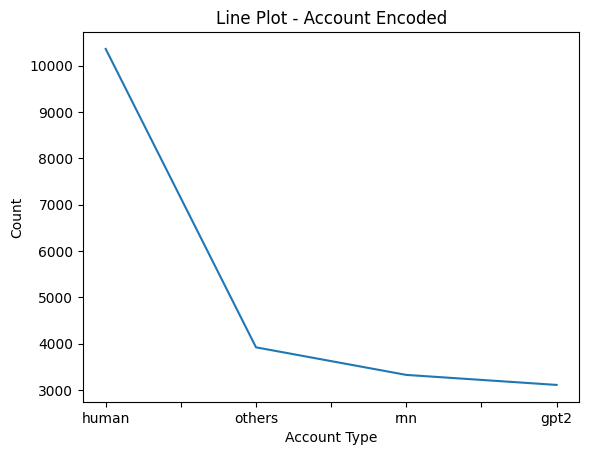

In [47]:
value_counts_df1.plot(kind="line", title="Line Plot - Account Encoded")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()


### Box Plot

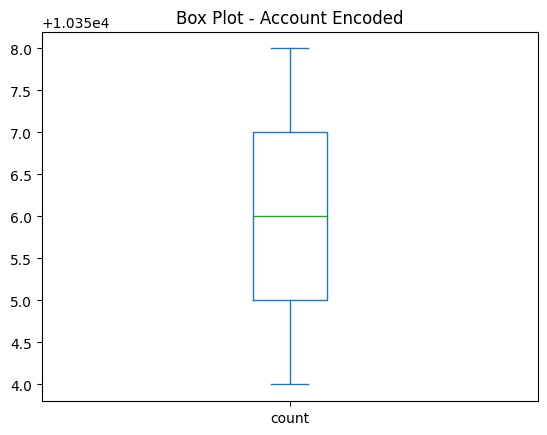

In [48]:
value_counts_df.plot(kind="box", title="Box Plot - Account Encoded")
plt.show()

### Histogram

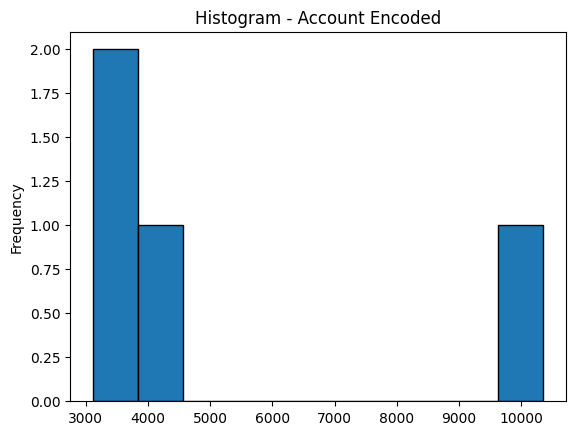

In [49]:
value_counts_df1.plot(kind='hist', title="Histogram - Account Encoded", edgecolor='black')
plt.show()

### Pie Chart

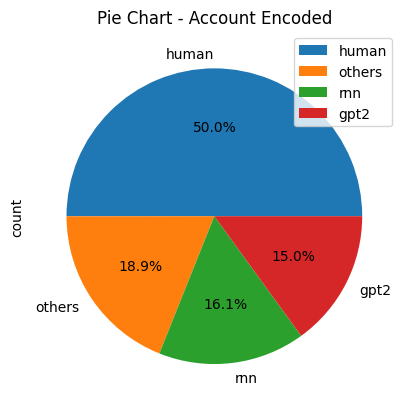

In [50]:
value_counts_df1.plot.pie(title="Pie Chart - Account Encoded", autopct='%1.1f%%')
plt.legend(value_counts_df1.index,)
plt.show()

### Bar Plot

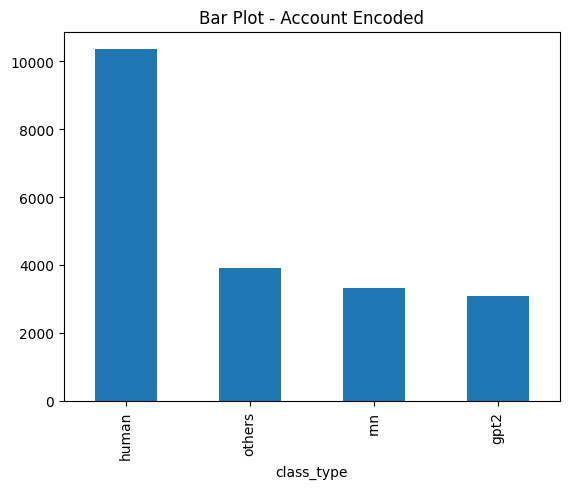

In [51]:
value_counts_df1.plot(kind='bar', title="Bar Plot - Account Encoded")
plt.show()

### Seaborn Countplot

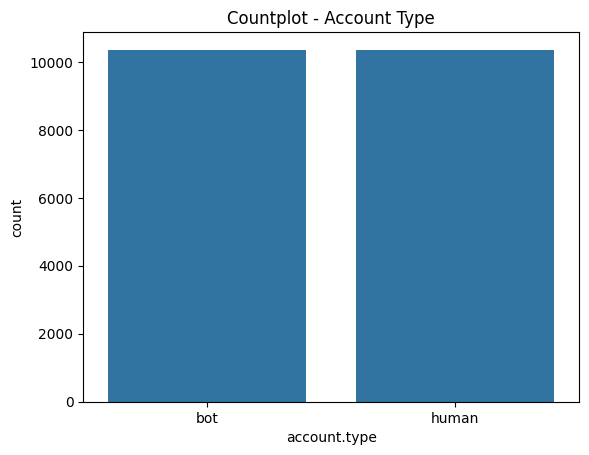

In [52]:
sns.countplot(x='account.type', data=df)
plt.title("Countplot - Account Type")
plt.show()

## ===== BIVARIATE ANALYSIS =====

### Scatter Plot

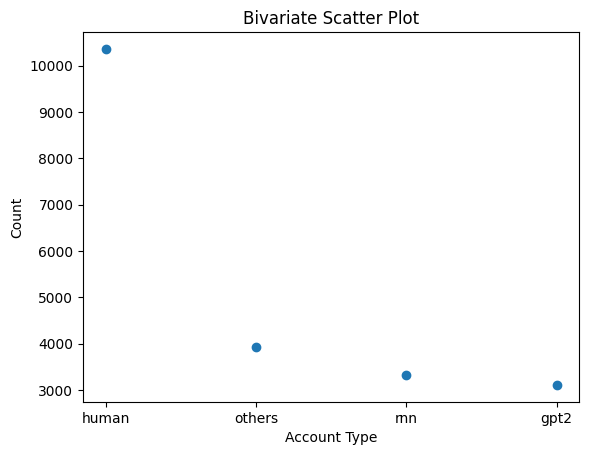

In [53]:
plt.scatter(value_counts_df1.index, value_counts_df1.values)
plt.title("Bivariate Scatter Plot")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()


### Seaborn Barplot 


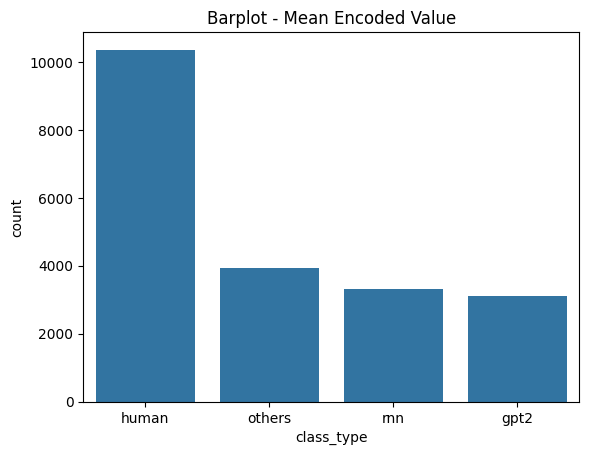

In [54]:
sns.barplot( data=value_counts_df1)
plt.title("Barplot - Mean Encoded Value")
plt.show()


### Boxplot


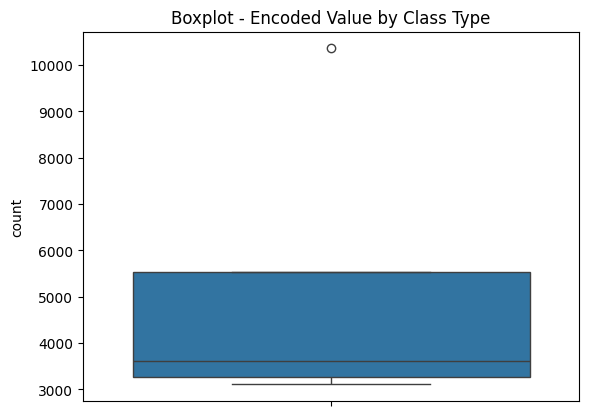

In [55]:
sns.boxplot( data=value_counts_df1)
plt.title("Boxplot - Encoded Value by Class Type")
# plt.xticks(rotation=45)
plt.show()